In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=1)
plt.rc('figure', figsize=(12, 3))

In [153]:
datafile = 'data/SensorLog_deco31mai_16559-5312018.csv'

In [154]:
data = np.genfromtxt(datafile, delimiter=';', skip_header=0, names=True)
data['TimeStampms'] = data['TimeStampms'] - data['TimeStampms'][0]

In [155]:
data.dtype.names

('TimeStampms',
 'ProxCm',
 'Luxlux',
 'AccXms2',
 'AccYms2',
 'AccZms2',
 'GyroXrads',
 'GyroYrads',
 'GyroZrads',
 'MagnXuT',
 'MagnYuT',
 'MagnZuT',
 'OrienYawdegrees',
 'OrienPitchdegrees',
 'OrienRolldegrees',
 'PressPa',
 'TempC°',
 'Batt',
 'Lat',
 'Lng',
 'Speedms')

In [157]:
iStart, iEnd = 1000, 1000

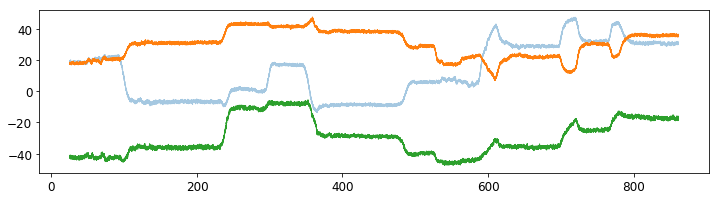

In [171]:
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['MagnXuT'], alpha=0.4 )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['MagnYuT'] )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['MagnZuT'] )

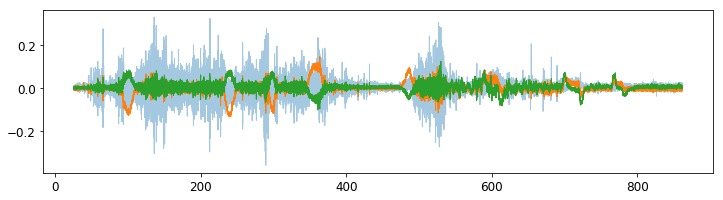

In [169]:
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['GyroXrads'], alpha=0.4 )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['GyroYrads'] )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['GyroZrads'] )

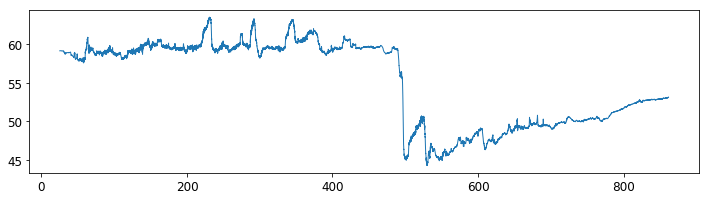

In [170]:
#plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['OrienYawdegrees'], alpha=0.4 )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['OrienPitchdegrees'] )
#plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['OrienRolldegrees'] )

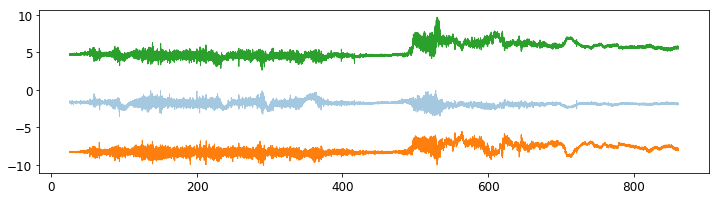

In [158]:
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['AccXms2'], alpha=0.4 )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['AccYms2'] )
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['AccZms2'] )

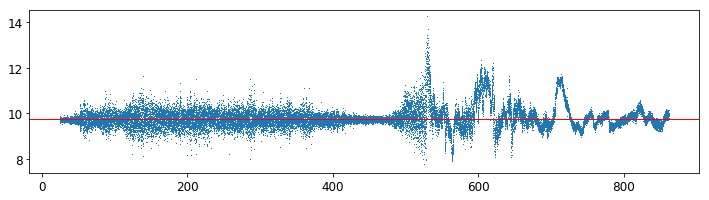

In [159]:
accMagn = ( data['AccXms2']**2 + data['AccYms2']**2 + data['AccZms2']**2 )**0.5

plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, accMagn[iStart:-iEnd], ',' );
plt.axhline( y=accMagn.mean(), color='r' );

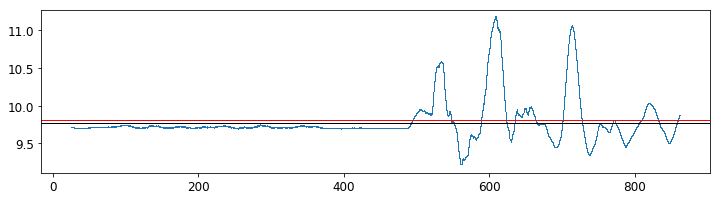

In [167]:
N = int( 1000/25*15 )
accMagnSmooth = np.convolve(accMagn, np.ones((N,))/N, mode='same')

plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, accMagnSmooth[iStart:-iEnd], ',' );
plt.axhline( y=accMagn.mean(), color='k' );
plt.axhline( y=9.81, color='r' );

In [146]:
accMagn[iStart:-iEnd].mean()

9.775559180308086

In [147]:
np.diff( data[iStart:-iEnd]['TimeStampms'] ).mean()

25.1917540055415

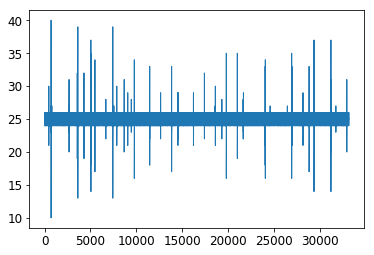

In [86]:
plt.plot(np.diff( data[iStart:-iEnd]['TimeStampms'] ))

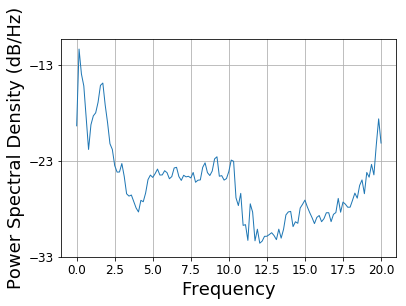

In [75]:
psd, freq = plt.psd( accMagn[iStart:-iEnd], Fs=1000/25, detrend='constant')

In [77]:
from scipy import signal

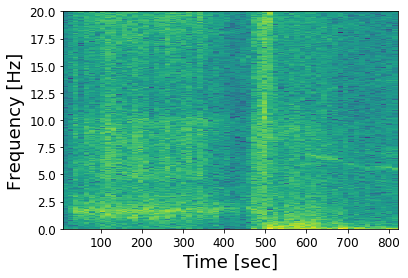

In [110]:
f, t, Sxx = signal.spectrogram(accMagn[iStart:-iEnd], 1000/25, nperseg=600, detrend='constant')
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yscale('log')
plt.show()

In [103]:
f

array([0.0000e+00, 4.0000e-03, 8.0000e-03, ..., 1.9992e+01, 1.9996e+01,
       2.0000e+01])

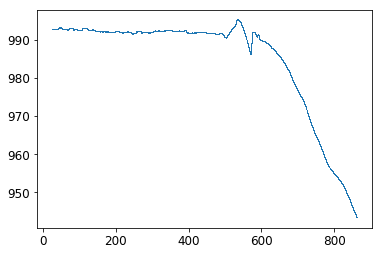

In [114]:
plt.plot( data[iStart:-iEnd]['TimeStampms']*1e-3, data[iStart:-iEnd]['PressPa'], ',');

In [80]:
data['TimeStampms'][iStart:-iEnd][-1]/1000

861.698

In [81]:
len(data)

35205

In [87]:
import pandas

In [88]:
1000/25

40.0

In [97]:
1/0.08

12.5

In [98]:
1/20.

0.05